#**N-gram 언어모델 (N-gram language Model)**


##N-gram이란?

N-gram은 N개의 문자열 크기만큼의 window를 만들어 왼쪽에서 오른쪽으로 한 단위씩 움직이며 추출되는 시퀀스의 집합을 기록하는 것이다. 이때 N은 얼마만큼의 단위로 잘라낼지를 나타내는 지표이다. N이 1이면 unigram, 2이면 bigram, 3이면 trigram이라 부르고, N 값은 더 커질 수 있다. 

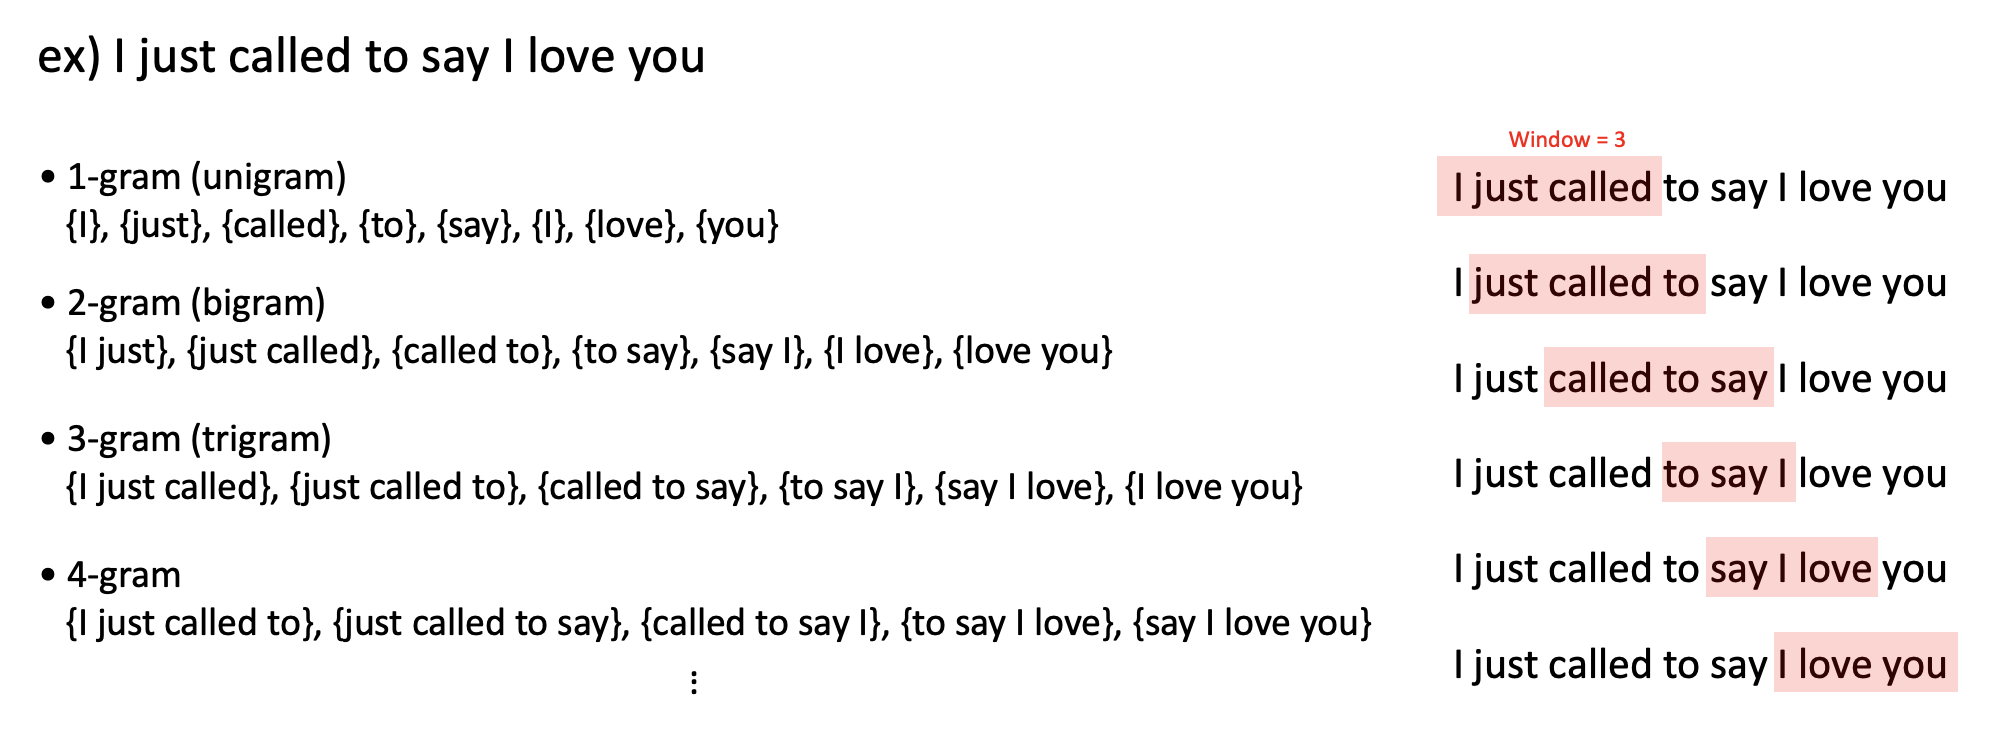

문장에서 N-gram을 생성할 때, 어떤 단위로 잘라내는지에 따라서 word level과 character level로 나뉜다. word level의 N-gram을 사용하면 단어나 문구의 출현빈도를 파악하는 데에 용이하고, character level의 N-gram을 사용하면 misspelled words를 다루거나 Native language identification 등에 좀 더 효과적이다.

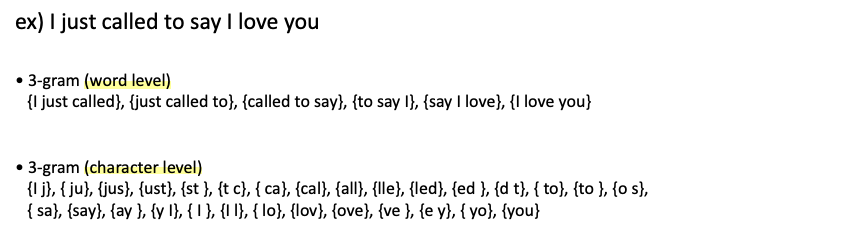

이러한 N-gram을 사용하는 대표적인 사례는 [구글 북스 엔그램(Google Books N-gram)](https://books.google.com/ngrams)이 있다. 구글이 모든 책들을 디지털화 시키면서 함께 진행한 프로젝트로, 모든 책들로부터 N-gram의 각 출현 빈도를 계산하여 그래프로 제공해준다. 책은 보통 그 시대의 이야기를 담고 있기 때문에, 이를 통해 이전엔 분석하기 어려웠던 문화의 전개 방향이나 당대의 관심사 등을 쉽게 파악할 수 있다. 

예를 들면 'doughnut'으로 쓰이던 도넛의 철자를 'donut'으로 쓰기 시작한 게 '던킨도너츠Donuts'의 창립된 1950년대부터였다는 사실을 파악할 수 있다. 더불어 2014년부터 'doughnut'보다 'donut'의 쓰임이 더 많아진 것을 보면 '던킨도너츠'가 시대에 미친 영향력을 알 수 있다. 


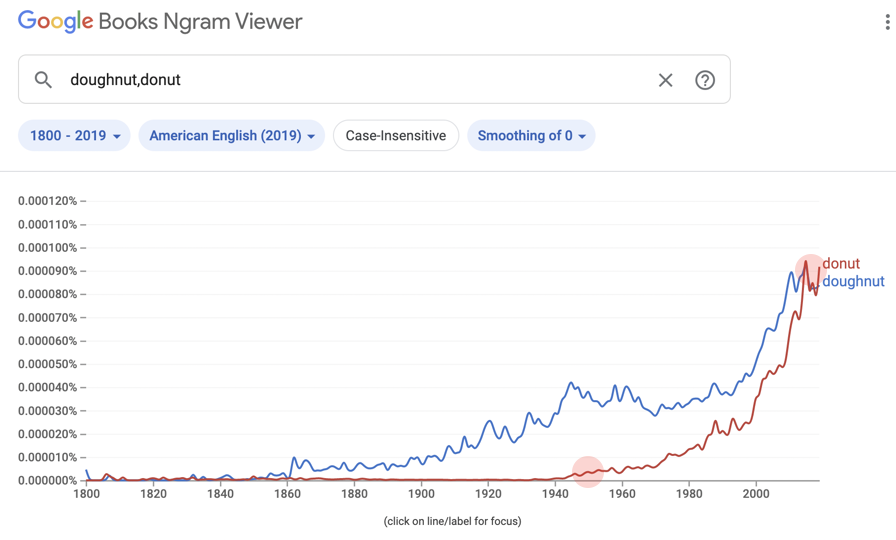

##예제 : N-gram을 이용한 문서요약


미국 제9대 대통령인 [윌리엄 헨리 해리슨 취임연설문](http://pythonscraping.com/files/inaugurationSpeech.txt)을 사용하여, 다음과 같이 N-gram을 생성하고 정렬하는 코드를 만들 수 있다. 


In [ ]:
from urllib.request import urlopen
from random import randint
import re
import string
from collections import Counter
import numpy as np
import pandas as pd

#문장을 클렌징
def cleanSentence(sentence): 
    sentence = sentence.split(' ') #띄어쓰기를 기준으로 나누기
    sentence = [word.strip(string.punctuation+string.whitespace) #문자열 맨 앞과 맨 뒤의 구두점, 공백 삭제
                for word in sentence]
    sentence = [word for word in sentence 
                if len(word) > 1 
                or (word.lower() == 'a' or word.lower() == 'i')] #A 혹은 I를 제외하고 단어 길이가 1인 경우 제거
    return sentence

#연설문을 클렌징
def cleanInput(content):
    content = re.sub('\n|[[\d+\]]', ' ', content) #줄바꿈 또는 숫자를 공백으로 대체
    content = bytes(content, 'UTF-8') 
    content = content.decode('UTF-8', 'ignore')
    sentences = content.split('. ') #한문장씩 나누기
    return [cleanSentence(sentence) for sentence in sentences] 

# 불용어 제거
def isCommon(ngram):
    commonWords = ['the', 'be', 'and', 'of', 'a', 'in', 'to', 'have', 'it', 'i',
                    'that', 'for', 'you', 'he', 'with', 'on', 'do', 'say', 'this', 'they',
                    'is', 'an', 'at', 'but', 'we', 'his', 'from', 'that', 'not', 'by',
                    'she', 'or', 'as', 'what', 'go', 'their', 'can', 'who', 'get', 'if',
                    'would', 'her', 'all', 'make', 'about', 'known', 'will', 'as',
                    'up', 'one', 'time', 'has', 'been', 'there', 'year', 'so', 'think',
                    'when', 'which', 'them', 'some', 'me', 'people', 'take', 'out', 'into',
                    'come', 'could', 'now', 'than', 'like','was', 'any', 'my', 'upon', 'na',
                    'other', 'how', 'then', 'its', 'our', 'two', 'more', 'these', 'want', 'those',
                    'also','no', 'man', 'find', 'here', 'thing', 'give', 'many', 'well', 'are']

    for word in ngram:
        if word in commonWords:
            return True
    return False

def getNgramsFromSentence(content, n): #여기서 n은 n-gram의 n, 즉 윈도우
    output = []
    for i in range(len(content)-n+1): #시퀀스 집합 개수
        if not isCommon(content[i:i+n]): 
            output.append(content[i:i+n]) #isCommon이 False인 경우 n 길이 만큼의 단어를 output 리스트에 추가
    return output 

def getNgrams(content, n):
    content = cleanInput(content)
    ngrams = Counter() #항목의 개수를 세기위한 클래스
    ngrams_list = [] 
    for sentence in content:
        newNgrams = [' '.join(ngram) for ngram in getNgramsFromSentence(sentence, n)] 
        ngrams_list.extend(newNgrams)
        ngrams.update(newNgrams)
    return ngrams

In [ ]:
speech = 'http://pythonscraping.com/files/inaugurationSpeech.txt'
content = str(urlopen(speech).read(),'utf-8').lower()
content

'called from a retirement which i had supposed was to continue for the residue of my life to fill the chief executive office of this great and free nation, i appear before you, fellow-citizens, to take the oaths which the constitution prescribes as a necessary qualification for the performance of its duties; and in obedience to a custom coeval with our government and what i believe to be your expectations i proceed to present to you a summary of the principles which will govern me in the discharge of the duties which i shall be called upon to perform.\n\nit was the remark of a roman consul in an early period of that celebrated republic that a most striking contrast was observable in the conduct of candidates for offices of power and trust before and after obtaining them, they seldom carrying out in the latter case the pledges and promises made in the former. however much the world may have improved in many respects in the lapse of upward of two thousand years since the remark was made 

In [ ]:
ngrams = getNgrams(content, 2)
print(ngrams) #연설문 본문에서 발견한 2-gram, 즉 핵심 주제

Counter({'united states': 10, 'executive department': 4, 'general government': 4, 'chief magistrate': 3, 'legislative body': 3, 'same causes': 3, 'government should': 3, 'whole country': 3, 'express grant': 2, 'several departments': 2, 'american citizen': 2, 'reserved rights': 2, 'federal government': 2, 'increase itself': 2, 'were made': 2, 'heretofore given': 2, 'pristine health': 2, 'second term': 2, 'observed however': 2, 'foreign relations': 2, 'executive power': 2, 'declare void': 2, 'both houses': 2, 'used only': 2, 'state governments': 2, 'immediate representatives': 2, 'veto power': 2, 'high office': 2, 'disputed points': 2, 'respectively claim': 2, 'reserved powers': 2, 'state authorities': 2, 'great increase': 2, 'elective franchise': 2, 'strange indeed': 2, 'public money': 2, 'religious liberty': 2, 'should never': 2, 'propose amendments': 2, 'exclusive metallic': 2, 'metallic currency': 2, 'american citizens': 2, 'domestic concerns': 2, 'foreign aggression': 2, 'individual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Possible nested set at position 3


*   The Constitution of the **United States** is the instrument containing this grant of power to the several departments composing the Government.

*   Such a one was afforded by the **executive department** constituted by the Constitution.

*   The **General Government** has seized upon none of the reserved rights of the States.

*   Although the fiat of the people has gone forth proclaiming me the **Chief Magistrate** of this glorious Union, nothing upon their part remaining to be done, it may be thought that a motive may exist to keep up the delusion under which they may be supposed to have acted in relation to my principles and opinions; and perhaps there may be some in this assembly who have come here either prepared to condemn those I shall now deliver, or, approving them, to doubt the sincerity with which they are now uttered.

*   It may be said, indeed, that the Constitution has given to the Executive the power to annul the acts of the **legislative body** by refusing to them his assent. 

##예제 : N-gram을 이용한 문장생성


2-gram을 사용해 기존 노래 가사를 모방하는 **마르코프 체인(Markov Chain)**을 만들어서 새로운 문장을 생성해볼 수 있다.

  - 마르코프 체인은 과거의 데이터를 기반으로 예측을 하는 방법이다. 1개 또는 n개의 이전 상태가 주어졌을때 다음 상태가 나올 확률을 계산할 수 있다.
  - 즉 2-gram을 사용해 마르코프 체인을 만들면 단어 하나가 다음 단어를 예측하게 되고, 3-gram이나 그 이상의 n-gram을 사용하면 두개 이상의 단어에서 다음 단어를 예측하게 된다.
  - 이를 사용하여 문장을 자동으로 생성하는 것이 가능하다. 전체 텍스트를 검사하여 각각 단어에서 다음 단어가 나타나는 확률을 모두 구한다. 그리고 특정 단어로 시작하여 가장 높은 확률의 단어를 계속 선택하여 문장을 만들 수 있습니다.

다음의 그림 왼쪽에서 1차 마르코프 체인(즉, 2-gram) '좋아한다'가 나타날 확률은 '영희를'에만 영향을 받지 '철수는'에는 영향을 받지 않는다. 반면 오른쪽의 2차 마르코프 체인(즉, 3-gram) '좋아한다'가 나타날 확률은 '철수는'과 '영희를'의 영향을 받게 된다. 따라서 N-gram의 N을 늘릴 수록 좀 더 자연스럽게 문장을 생성하는 마르코프 체인을 만들 수 있다. 예시에서는 1차 마르코프 체인을 사용해서 문장을 생성해본다.

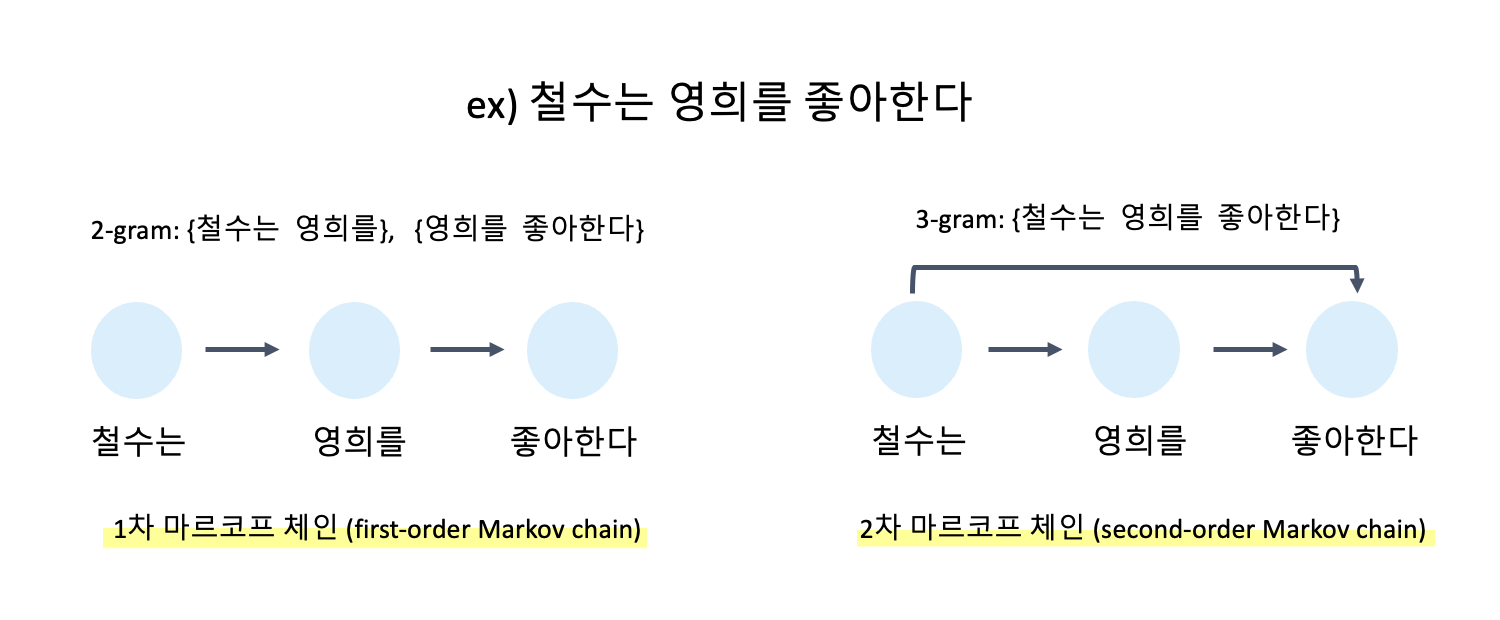

In [ ]:
# 멜론(Melon) 음악 차트를 크롤링하여 장르별 Top50의 노래 가사 수집
Ballade_url = 'https://raw.githubusercontent.com/Sol-J/Study/master/data/melon_ballade_top50.csv' 
Hiphop_url = 'https://raw.githubusercontent.com/Sol-J/Study/master/data/melon_hiphop_top50.csv' 
Trot_url = 'https://raw.githubusercontent.com/Sol-J/Study/master/data/melon_trot_top50.csv' 

Ballade = pd.read_csv(Ballade_url) 
Hiphop = pd.read_csv(Hiphop_url)
Trot = pd.read_csv(Trot_url)

Ballade.head()

,순위,제목,가수,가사
0,1,밤하늘의 별을(2020),경서,밤하늘의 별을 따서 너에게 줄래\n너는 내가 사랑하니까\n더 소중하니까\n오직 너 ...
1,2,잠이 오질 않네요,장범준,당신은 날 설레게 만들어\n조용한 내 마음 자꾸만 춤추게 해\n얼마나 얼마나 날 떨...
2,3,내 손을 잡아,아이유,느낌이 오잖아\n\n떨리고 있잖아\n\n언제까지 눈치만 볼 거니\n\n네 맘을 말해...
3,4,취기를 빌려 (취향저격 그녀 X 산들),산들,언제부턴가 불쑥\n내 습관이 돼버린 너\n혹시나 이런 맘이\n어쩌면 부담일까\n널 ...
4,5,이 밤을 빌려 말해요 (바른연애 길잡이 X 10CM),10CM,나의 두 눈에 제일 먼저 그대를 담고\n가장 예쁜 말들로 그댈 미소 짓게 하고\n바...


In [ ]:
lyrics= Hiphop['가사'].tolist()
Hiphop_lyrics = ' '.join(lyrics)

lyrics= Ballade['가사'].tolist()
Ballade_lyrics = ' '.join(lyrics)

lyrics= Trot['가사'].tolist()
Trot_lyrics = ' '.join(lyrics)

In [ ]:

def wordListSum(wordList): 
    sum = 0
    for word, value in wordList.items(): #딕셔너리에서 key와 value 쌍을 반환
        sum += value 
    return sum #word 빈도 합계를 반환

#딕셔너리를 받고 그 딕셔너리에 있는 단어들의 빈도를 참고해서 무작위 단어를 생성한다.
def retrieveRandomWord(wordList):
    randIndex = randint(1, wordListSum(wordList))
    for word, value in wordList.items():
        randIndex -= value 
        if randIndex <= 0: #이어서 동일한 인덱스를 가진 단어가 나오지 않도록 함
            return word

#wordDict을 만들면 현재 단어가 무엇이든 간에 다음 단어로 찾아갈 수 있는 검색 테이블 구실을 할 수 있다.
def buildWordDict(text): 
    # 줄바꿈 문자와 따움표를 제거한다.
    text = text.replace('\n', ' ');
    text = text.replace('"', '');
    
    # 구두점 역시 단어로 취급해서 마르코프 체인에 들어가도록 한다.
    punctuation = [',','.',';',':']
    for symbol in punctuation:
        text = text.replace(symbol, ' {} '.format(symbol));

    words = text.split(' ')
    # 빈단어를 제거한다.
    words = [word for word in words if word != '']
    
    wordDict = {}
    for i in range(1, len(words)):
        if words[i-1] not in wordDict:
            # 이 단어에 필요한 새 딕셔너리를 만듭니다.
            wordDict[words[i-1]] = {}
        if words[i] not in wordDict[words[i-1]]:
            wordDict[words[i-1]][words[i]] = 0
        wordDict[words[i-1]][words[i]] += 1
    return wordDict

In [ ]:
wordDict_B = buildWordDict(Ballade_lyrics)
wordDict_H = buildWordDict(Hiphop_lyrics)
wordDict_T = buildWordDict(Trot_lyrics)

length = 10
chain_B = ['사랑을']
chain_H = ['사랑을']
chain_T = ['사랑을']

for i in range(0, length):
    newWord_B = retrieveRandomWord(wordDict_B[chain_B[-1]]) # 1차 마르코프 체인
    chain_B.append(newWord_B)

    newWord_H = retrieveRandomWord(wordDict_H[chain_H[-1]])
    chain_H.append(newWord_H)   

    newWord_T = retrieveRandomWord(wordDict_T[chain_T[-1]])
    chain_T.append(newWord_T)   

print('발라드 : ',' '.join(chain_B))
print('힙합 : ',' '.join(chain_H))
print('트로트 : ',' '.join(chain_T))

발라드 :  사랑을 하면 할수록 뭐 그리도 어려운 건지 홀로 남겨질 내게 왔던
힙합 :  사랑을 썼고 하루 신이 있다면 고민 따위를 하덜덜 마 쉽게 웃어주는
트로트 :  사랑을 알겠지 이쁜 사람 버들피리 불던 내 님 곁으로 늦기 전에


In [ ]:
wordDict_T['사랑을'] # 확률적으로 '사랑을' 이라는 단어에서 30%는 '믿었었는데'로 향하고, 나머지 30%는 '할거야', 약 10%는 '알겠지', 약 20%는 '태워도'로 향하게 된다. 

{'믿었었는데': 3, '알겠지': 1, '태워도': 2, '할거야': 3}

In [ ]:
wordDict_T['알겠지']

{'이쁜': 1}

In [ ]:
wordDict_T['이쁜']

{'누나랍니다': 1, '사람': 1}

In [ ]:
wordDict_T['사람']

{'고마워요': 2,
 '그대': 1,
 '끌리네': 2,
 '나': 1,
 '내': 4,
 '많고': 1,
 '못': 1,
 '무얼': 2,
 '바다처럼': 1,
 '바로': 2,
 '버들피리': 1,
 '세상이': 1,
 '이런': 1,
 '있나': 1,
 '잘난': 1,
 '찐찐찐찐': 2,
 '최고였어': 2,
 '하모니카': 1}